In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/labs/lab1/data/corona.csv')
data

,Страна,заболевшие,выздоровевшие
0,германия,2078,25
1,дания,617,1
2,малайзия,149,26
3,австрия,302,4
4,ирак,71,15
5,китай,80932,62901
6,италия,12462,1045
7,сша,1663,12
8,сингапур,178,96
9,австралия,128,21


Посмотрим на scatterplot наших двух признаков. Каждая точка на графике соответствует какой-то стране. Координата по оси Х это количество заболевших. По оси У -- выздоровевших. Посмотрим, есть ли какие-то закономерности в расположении точек.

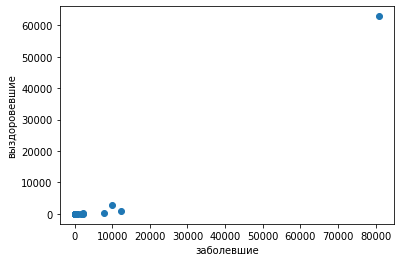

In [20]:
plt.scatter(data['заболевшие'], data['выздоровевшие'])
plt.xlabel('заболевшие')
plt.ylabel('выздоровевшие')
plt.show()

Видим, что одна из точек (Китай) находится довольно далеко от других, поэтому критерии, основанные на коэффициенте корреляции Пирсона, могут дать менее достоверный ответ, чем коэффициенты корреляции Спирмана и Кендалла.

Посмотрим на данные без Китая, чтобы получше понять расположение точек.

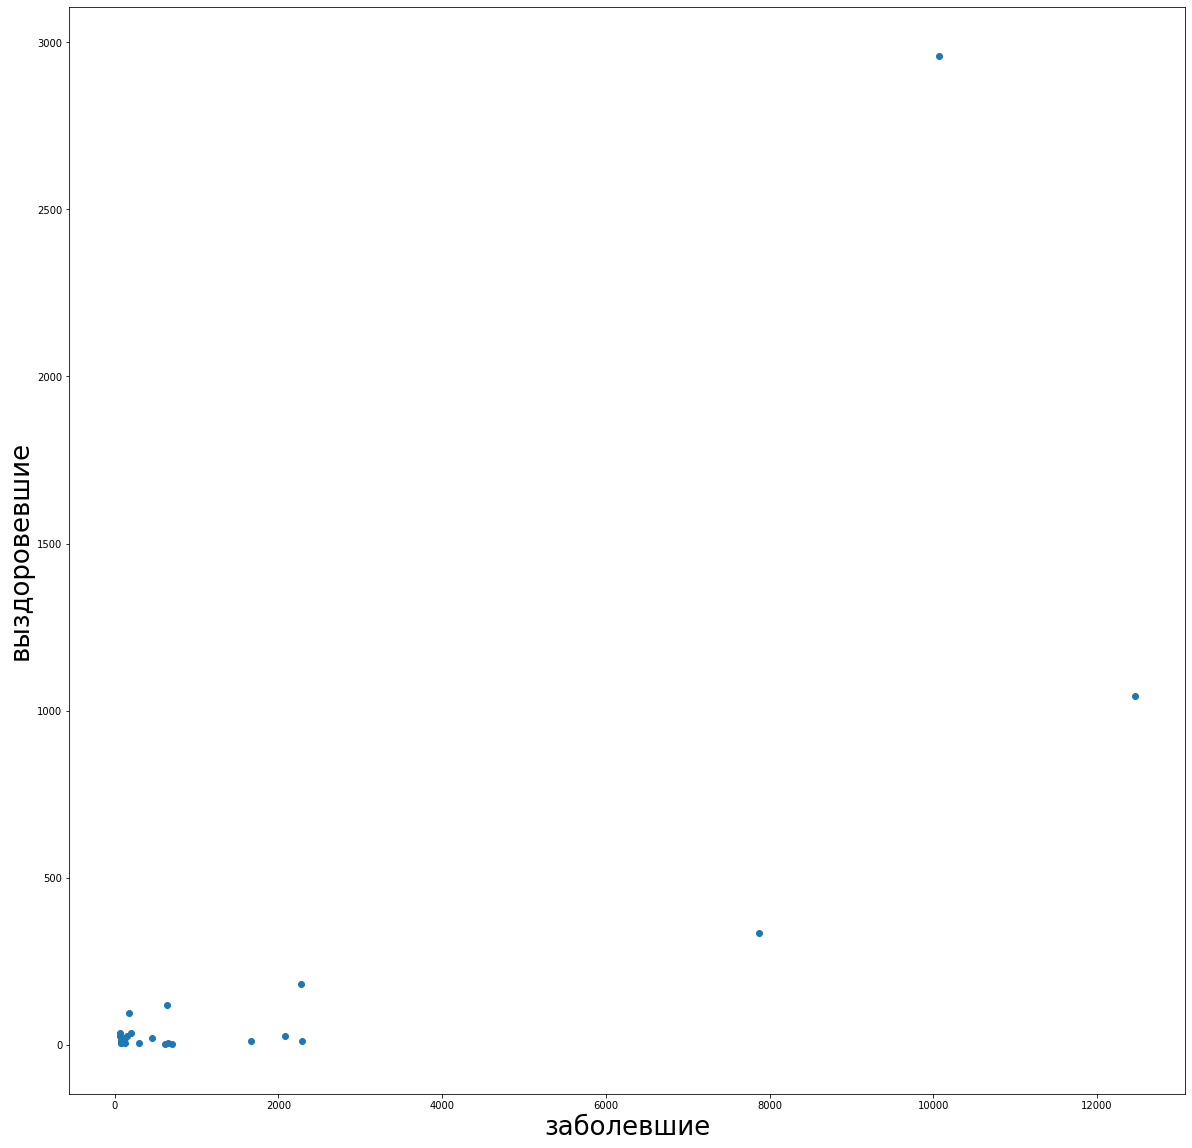

In [23]:
#data.drop(index=5)
plt.figure(figsize=(20,20))
plt.scatter(data.drop(index=5)['заболевшие'], data.drop(index=5)['выздоровевшие'])
plt.xlabel('заболевшие', fontsize=26)
plt.ylabel('выздоровевшие', fontsize=26)
plt.show()

Видим, что если зависимость и есть, то она несложная и похожа на линейную, поэтому можно для проверки использовать критерии основанные на коэффициенте корреляции Спирмана или Кендалла. Воспользуемся вторым.

На лекции был представлен следующий критерий

### Критерий без названия

$$H_0:\ \ \tau_{X_1X_2} = 0$$

$$H_1: \ \ \tau_{X_1X_2} <\neq > 0$$

$$\text{Статистика}:\ \ T(X_1^n, X_2^n) = \hat{\tau}_{X_1X_2} = 1 - \frac{4}{n(n-1)} \sum\limits_{i=1}^{n-1} \sum\limits_{j=1}^n [[X_{1i} < X_{1j}] \neq [X_{2i} < X_{2j}]]$$

$$\text{Нулевое распределение: при}\ \  n > 10\ \  {аппроксимируется нормальным}$$

При справедливости $H_0$:

$$\mathbb{E}\hat{\tau}_{X_1X_2} = 0$$
$$\mathbb{D}\hat{\tau}_{X_1X_2} = \frac{2(n+5)}{9n(n-1)}$$

Видим, что у нас если и имеется корреляция, то она положительная, поэтому в нашем случае надо проверять одностороннюю альтернативу $\tau_{X_1X_2} > 0$.

In [16]:
d = 0
n = len(data)
for i in range(n-1):
    for j in range(i+1, n):
        if (data['заболевшие'][i] < data['заболевшие'][j]) != (data['выздоровевшие'][i] < data['выздоровевшие'][j]):
            d += 1
tau = 1 - 4 / n / (n-1) * d
tau

0.27384615384615385

Теперь чтобы воспользоваться аппроксимацией нормальным распределением, надо разделить на стандартное отклонение. Тогда мы получим величину, которая при верности нулевой гипотезы распределена как стандартное нормальное.

$$\frac{\hat{\tau} }{\sqrt{\mathbb{D}\hat{\tau}_{X_1X_2} }} = \frac{\hat{\tau}}{\sqrt{2(n+5) / 9n(n-1)}} \sim N(0,1) $$

In [19]:
Var = 2*(n+5)/9/n/(n-1)
tau_norm = tau / np.sqrt(Var)
tau_norm

2.6600434706050735

По таблице квантилей стандартного нормального распределения находим, что $95%$-квантиль стандартного нормального распределения $t_{0,95} \approx 1.6$.  Поэтому правило принятия решения на основе статистики и нулевого распределения для обеспечения уровня значимости $\alpha = 0.05$:

$$H_0\ \ \text{отклоняется} \Leftrightarrow \text{tau_norm} > t_{0,95}$$

Как видим, для нашего tau_norm = 2.6 гипотеза отклоняется. То есть, данные положительно скоррелированы.

Теперь запишем выражение для мощности критерия в зависимости от истинного среднего значения $\tau$ (интегрируем по правому "хвосту" плотности нормального распределения):

$$R(\tau) = \int\limits_{t_{0.95}}^{+ \infty} p_{\mathcal{N} \left( \tau, \frac{2(2n+5)}{9n(n-1)} (1 - \tau^2)\right)} (x) dx$$